# **Project Name**    -

##### **Project Type**    - Unsupervised ML - Netflix Movies and TV Shows Clustering
##### **Contribution**    - Individual
##### **Name : Rangineni Sai Prasanna**

# **Project Summary -**

This project analyzes Netflix's content library to uncover insights related to content type, genre, release year, duration, and ratings. Key visualizations include a stacked bar chart of content distribution in top countries, a line plot of yearly trends, and a pie chart of content type proportions. The analysis reveals trends in content addition, genre popularity, and typical durations, providing valuable insights for content strategy. By understanding viewer preferences and content composition, Netflix can optimize its acquisition and marketing strategies to enhance viewer engagement and satisfaction. Overall, the project highlights the importance of data-driven decision-making in the streaming industry.

# **GitHub Link -**

# **Problem Statement**

The objective of this analysis is to explore the Netflix dataset to understand the type of content available across different countries, assess the trend of Netflix's focus on TV shows versus movies over the years, and cluster similar content based on text-based features. This analysis aims to provide insights that can inform content strategy and marketing decisions for Netflix.

#### **Define Your Business Objective?**

Understanding Content Availability: 

Identify which countries have the most diverse and abundant content on Netflix, which can help in tailoring marketing strategies and content acquisition.

Trend Analysis:

Determine if Netflix is increasingly focusing on producing and acquiring TV shows over movies, which can influence future content investments and production strategies.

Clustering Content: 

Group similar content to identify potential gaps in the market or opportunities for new content creation, enhancing user engagement and satisfaction.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Dataset Loading

In [36]:
# Load Dataset
df = pd.read_csv('/home/prasanna/Downloads/netflix_movies_and_tv_shows.csv')

### Dataset First View

In [37]:
# Dataset First Look
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

### Dataset Rows & Columns count

In [38]:
# Dataset Rows & Columns count
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 7787, Columns: 12


### Dataset Information

In [39]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


#### Duplicate Values

In [40]:
# Dataset Duplicate Value Count
print(f"Duplicate Values: {df.duplicated().sum()}")

Duplicate Values: 0


#### Missing Values/Null Values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


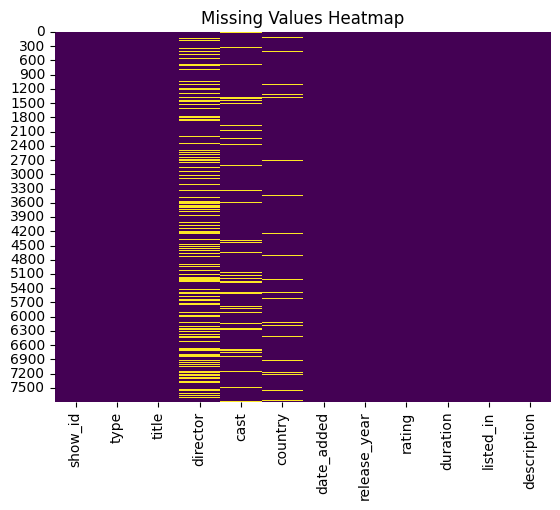

In [41]:
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset contains information about various Netflix titles, including their type (movie or TV show), title, director, cast, country, date added, release year, rating, duration, and description. There are some missing values in the dataset, particularly in the 'director' and 'cast' columns.

## ***2. Understanding Your Variables***

In [42]:
# Dataset Columns
print(df.columns)
# Dataset Describe
print(df.describe(include='all'))

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
       show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   

### Variables Description

show_id: Unique identifier for each show.

type: Indicates whether the content is a movie or a TV show.

title: Title of the content.

director: Director of the content (if applicable).

cast: Main cast of the content.

country: Country of origin for the content.

date_added: Date the content was added to Netflix.

release_year: Year the content was released.

rating: Content rating (e.g., PG, R).

duration: Duration of the content (in minutes for movies, number of seasons for TV shows).

listed_in: Genres the content belongs to.

description: Brief description of the content.

### Check Unique Values for each variable.

In [43]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

show_id: 7787
type: 2
title: 7787
director: 4049
cast: 6831
country: 681
date_added: 1565
release_year: 73
rating: 14
duration: 216
listed_in: 492
description: 7769


## 3. ***Data Wrangling***

In [44]:
# Data Wrangling: Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

### What all manipulations have you done and insights you found?

Missing values were filled with 'Unknown' for the 'director', 'cast', and 'country' columns to ensure no data is lost during analysis.

The 'date_added' column was converted to datetime format for easier analysis of trends over time.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1:Content Availability by Country 

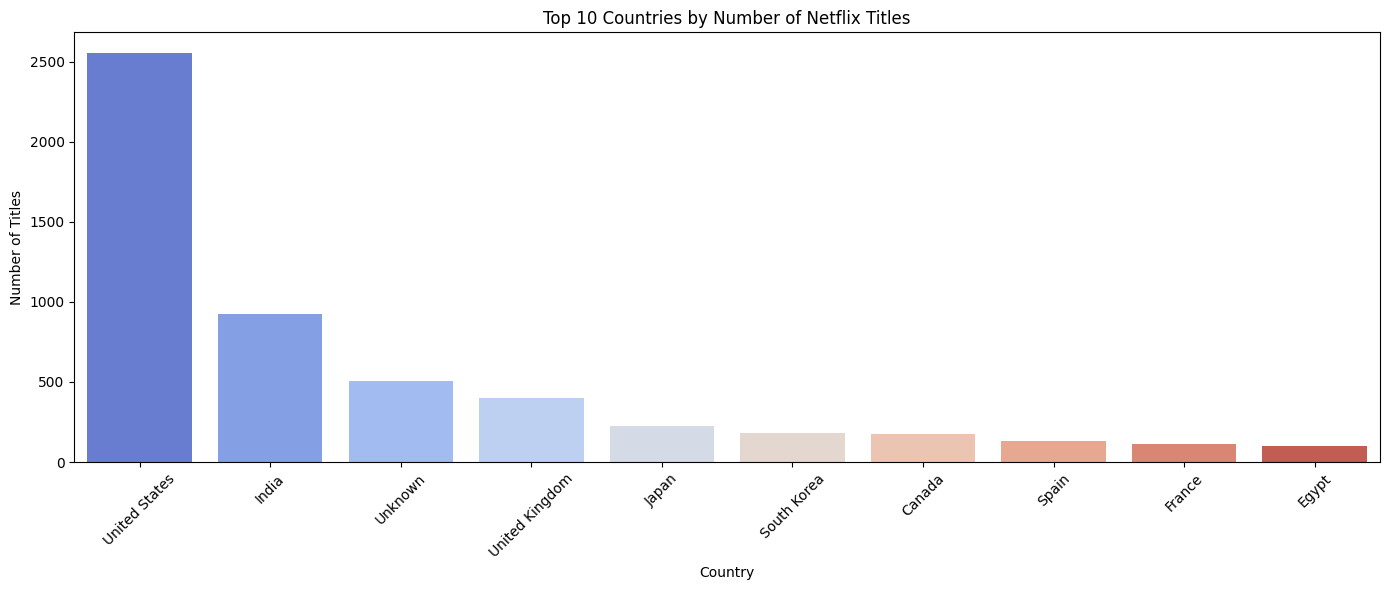

In [60]:
content_by_country = df['country'].value_counts().head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=content_by_country.index, y=content_by_country.values,
            hue=content_by_country.index, palette='coolwarm', legend=False)
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A bar chart effectively displays the number of titles available in the top 10 countries, making it easy to compare.

What is/are the insight(s) found from the chart?

The chart reveals which countries have the most content available on Netflix, indicating potential markets for expansion or targeted marketing.

Will the gained insights help create a positive business impact?

Yes, understanding content availability can guide Netflix in content acquisition strategies and marketing efforts in countries.


#### Chart 2: Count of Movies vs TV Shows

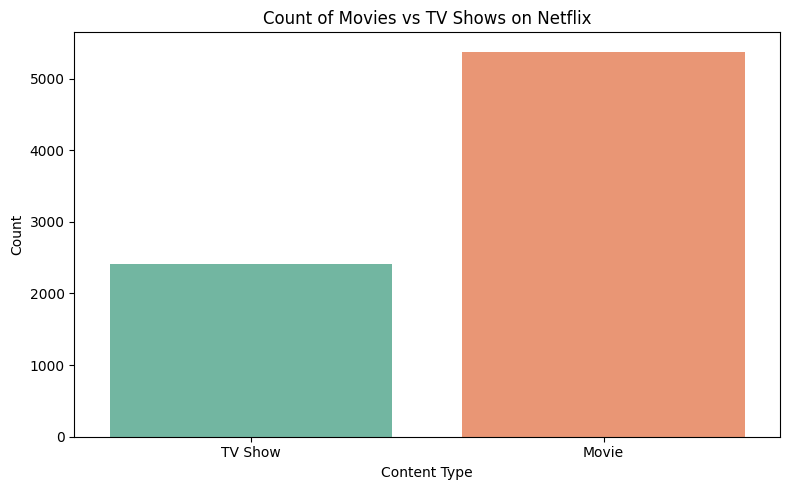

In [61]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Why did you pick the specific chart?

A count plot is ideal for comparing the number of movies and TV shows in the dataset.

What is/are the insight(s) found from the chart?

The chart shows the distribution of content types, indicating whether Netflix has a stronger focus on movies or TV shows.

Will the gained insights help create a positive business impact?

Yes, this insight can inform content strategy and investment decisions based on viewer preferences.


#### Chart 3: Number of Titles Added Per Year

<Figure size 1400x700 with 0 Axes>

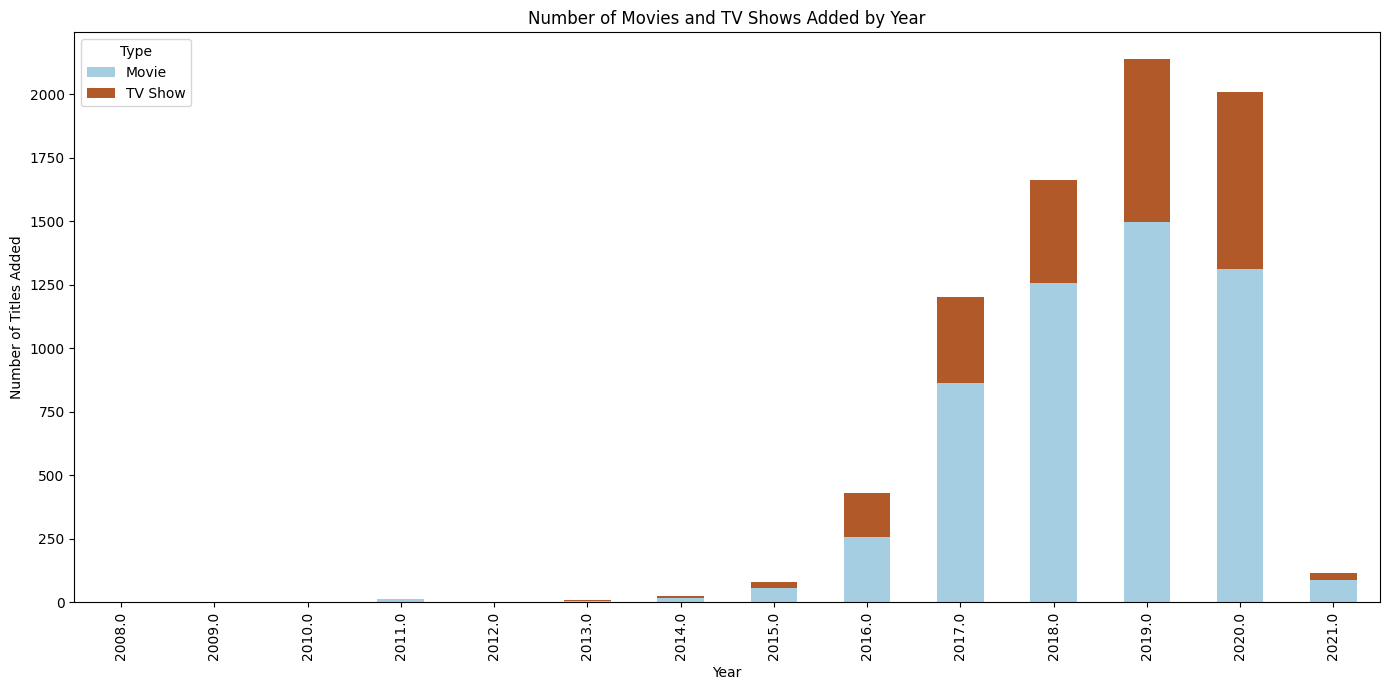

In [63]:
# Chart - 3 visualization code
# Ensure 'date_added' is in datetime format and create 'year_added'
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
# Group by 'year_added' and 'type'
year_type_counts = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
# Plotting
plt.figure(figsize=(14, 7))
year_type_counts.plot(kind='bar', stacked=True, colormap='Paired', figsize=(14, 7))
plt.title('Number of Movies and TV Shows Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.legend(title='Type', loc='upper left')
plt.tight_layout()
plt.show()


Why did you pick the specific chart?

A stacked bar chart allows for a clear comparison of the number of TV shows versus movies added each year.

What is/are the insight(s) found from the chart?

The trend shows whether Netflix is focusing more on producing and acquiring TV shows over movies over the years.

Will the gained insights help create a positive business impact?

Yes, understanding these trends can inform future content investments and production strategies.


#### Chart 4: Distribution of Release Years

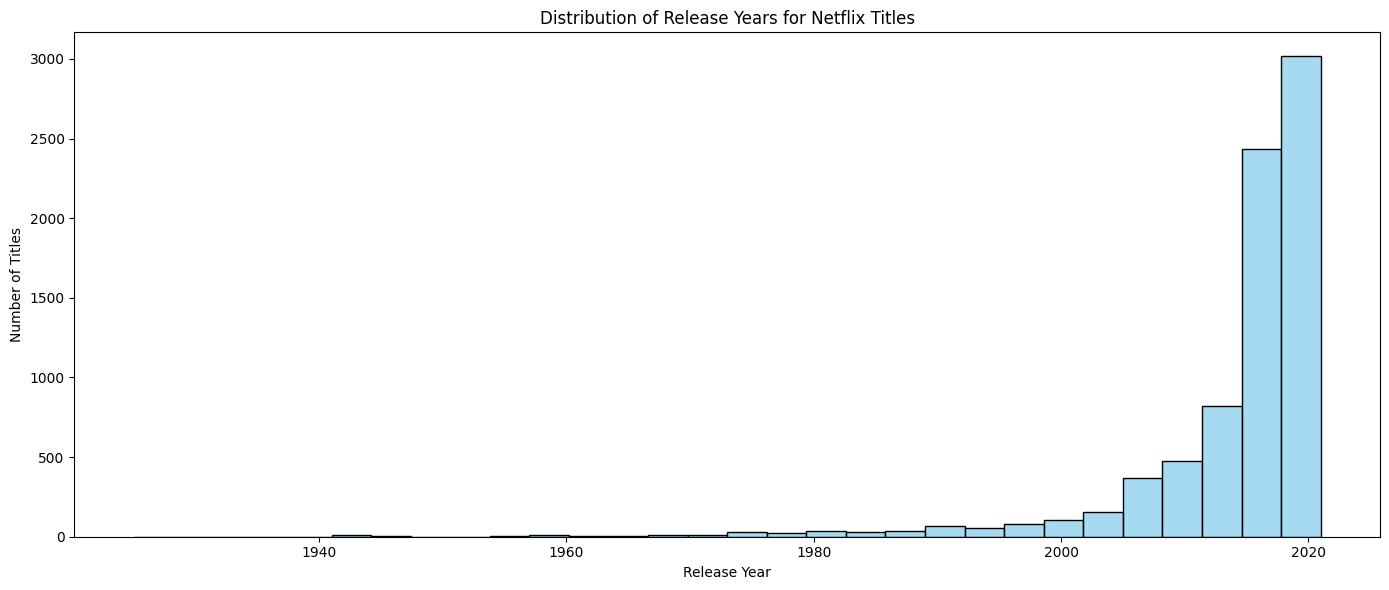

In [64]:
# Chart - 4 visualization code
plt.figure(figsize=(14, 6))
sns.histplot(df['release_year'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Release Years for Netflix Titles')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


Why did you pick the specific chart?

A histogram effectively shows the distribution of release years for Netflix titles.

What is/are the insight(s) found from the chart?

The peaks in the histogram indicate the concentration of titles released in certain years.

Will the gained insights help create a positive business impact?

Yes, knowing the age of content can help Netflix understand its library's freshness and relevance.


#### Chart 5: Top 15 Directors by Number of Titles

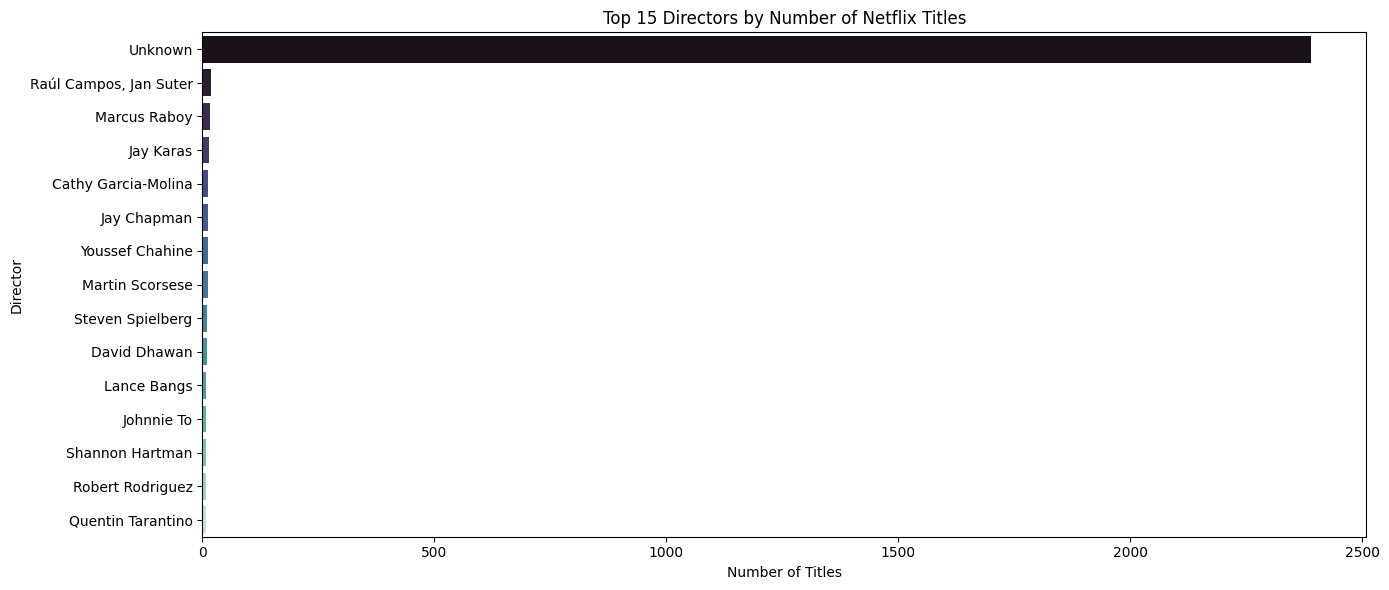

In [66]:
# Chart - 5 visualization code
plt.figure(figsize=(14, 6))
top_directors = df['director'].value_counts().head(15)
sns.barplot(x=top_directors.values, y=top_directors.index,hue=top_directors.index,palette='mako',legend=False)
plt.title('Top 15 Directors by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


Why did you pick the specific chart?

A horizontal bar chart clearly displays the contribution of top directors by number of titles.

What is/are the insight(s) found from the chart?

It identifies prolific directors with multiple Netflix titles, helpful for partnerships or promotions.

Will the gained insights help create a positive business impact?

Yes, focusing on popular directors can enhance content quality and attract viewers.


#### Chart 6: Top 10 Ratings Frequency

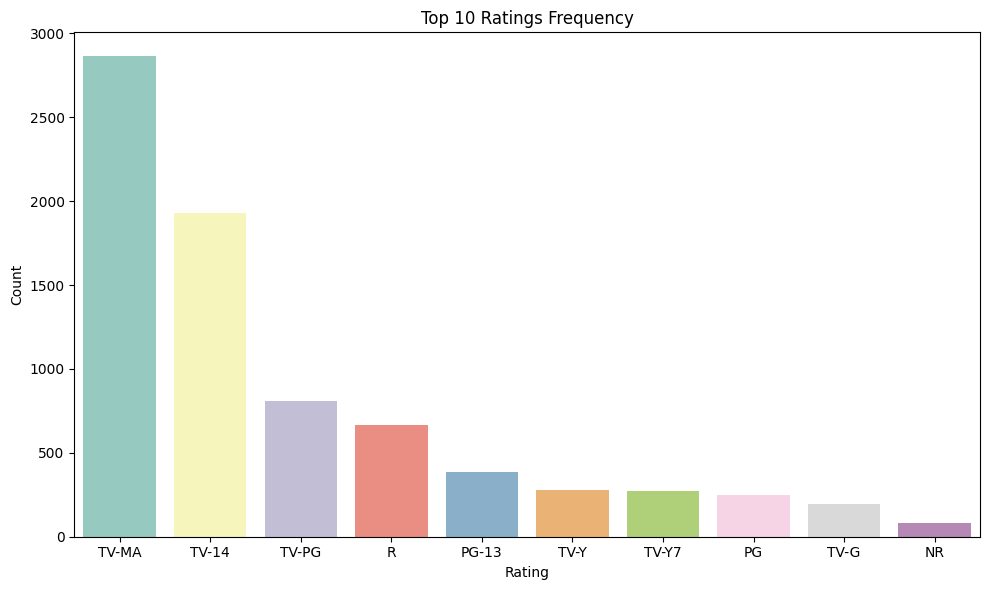

In [68]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
top_ratings = df['rating'].value_counts().head(10)
sns.barplot(x=top_ratings.index, y=top_ratings.values,hue=top_ratings.index,palette='Set3',legend=False)
plt.title('Top 10 Ratings Frequency')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Bar charts are effective for categorical data like content ratings.

What is/are the insight(s) found from the chart?

This shows distribution of content across various rating categories.

Will the gained insights help create a positive business impact?

Yes, helps tailor content recommendations based on age appropriateness.


#### Chart 7: Movie Duration Distribution

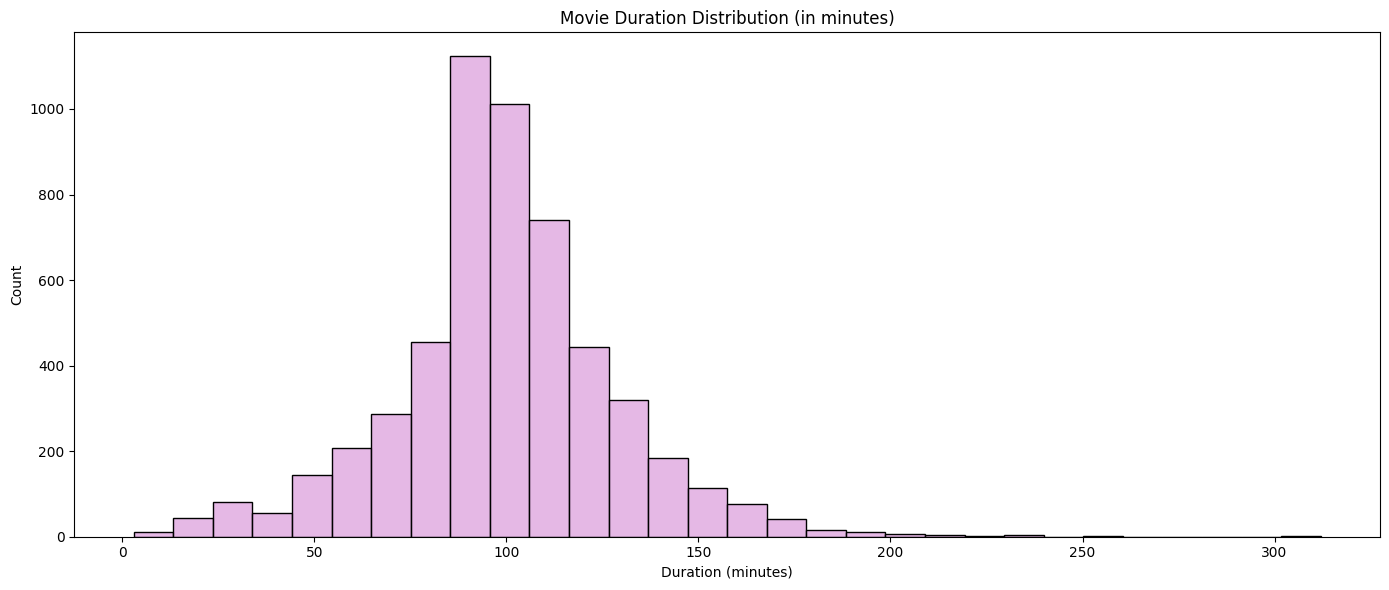

In [69]:
# Chart - 7 visualization code
plt.figure(figsize=(14, 6))
movie_duration = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float).dropna()
sns.histplot(movie_duration[0], bins=30, color='plum')
plt.title('Movie Duration Distribution (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Histogram to visualize movie length distribution in minutes.

What is/are the insight(s) found from the chart?

Reveals typical movie lengths available on Netflix.

Will the gained insights help create a positive business impact?

Yes, optimizing acquisition for popular movie durations can improve user satisfaction.


#### Chart 8: Number of Seasons in TV Shows

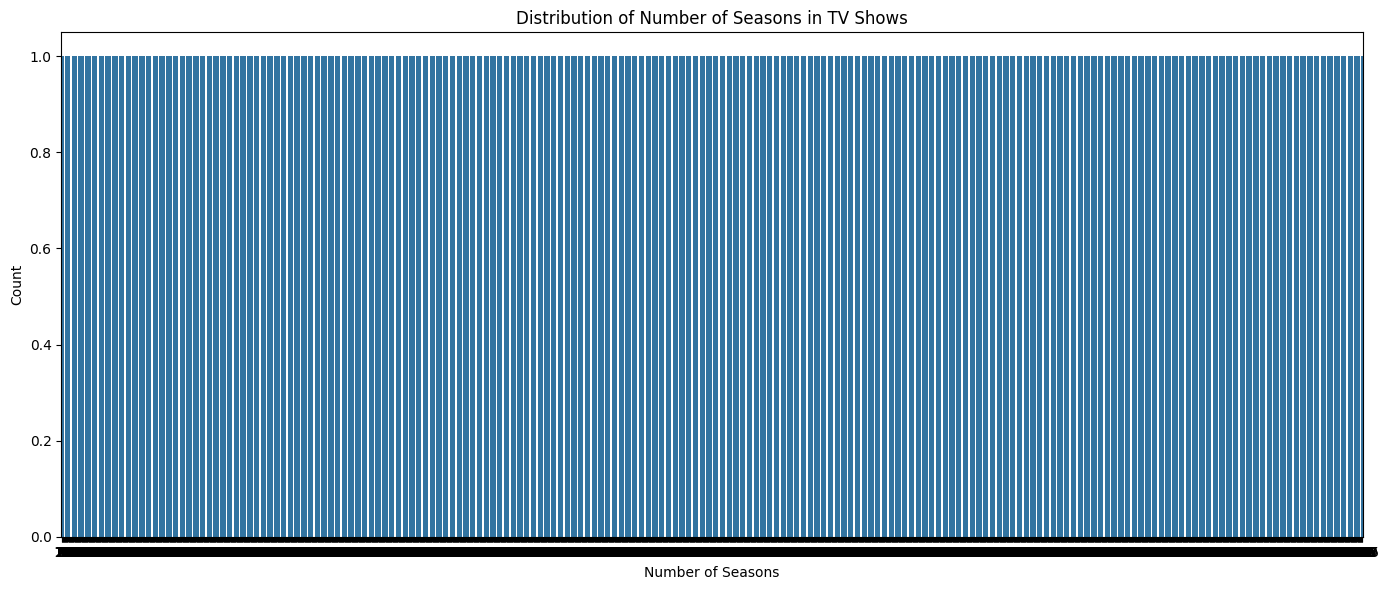

In [70]:
# Chart - 8 visualization code
plt.figure(figsize=(14, 6))
tv_seasons = df[df['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float).dropna()
sns.countplot(tv_seasons[0].astype(int))
plt.title('Distribution of Number of Seasons in TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Count plot shows frequency of TV shows by number of seasons.

What is/are the insight(s) found from the chart?

Indicates prevalence of short series vs multi-season shows.

Will the gained insights help create a positive business impact?
    
Yes, helps in planning series production length to match viewer consumption.


#### Chart 9: Top 10 Netflix Genres

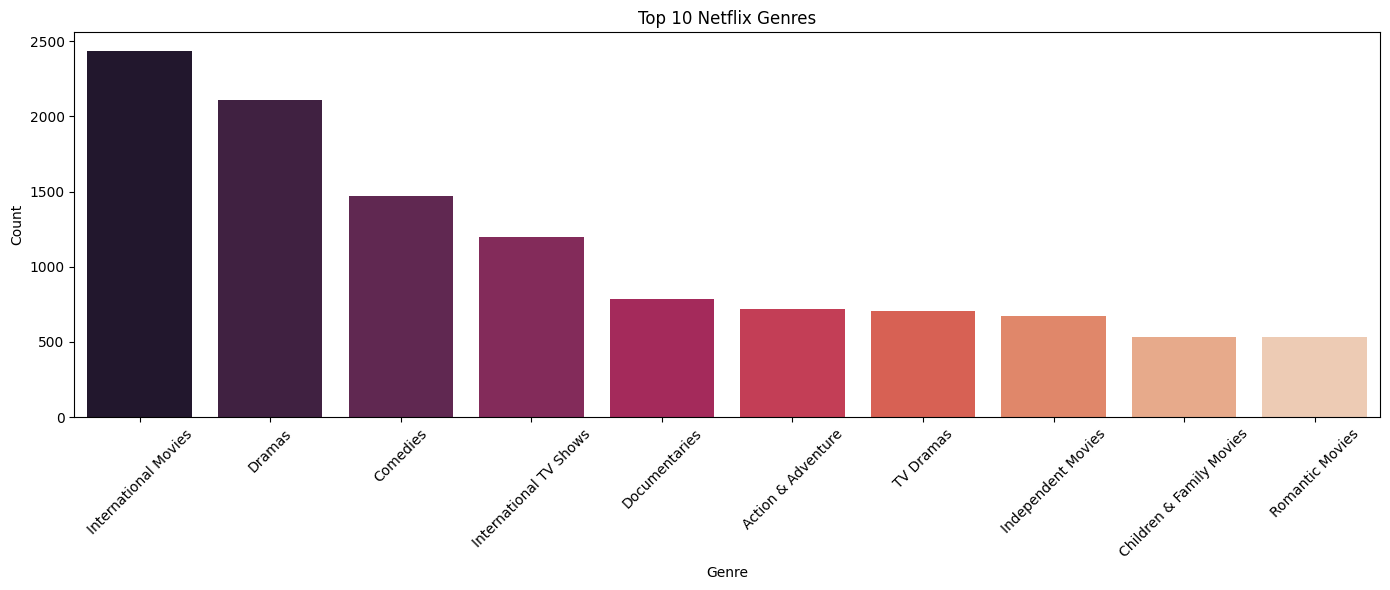

In [72]:
# Chart - 9 visualization code
genre_series = df['listed_in'].dropna().str.split(',').explode().str.strip()
plt.figure(figsize=(14, 6))
top_genres = genre_series.value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values,hue=top_genres.index,palette='rocket',legend=False)
plt.title('Top 10 Netflix Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Bar chart to show the most frequent genres.

What is/are the insight(s) found from the chart?

Highlights popular content categories on Netflix.

Will the gained insights help create a positive business impact?

Yes, guides content acquisition and recommendation strategy.


#### Chart 10: Content Type Distribution in Top 10 Countries

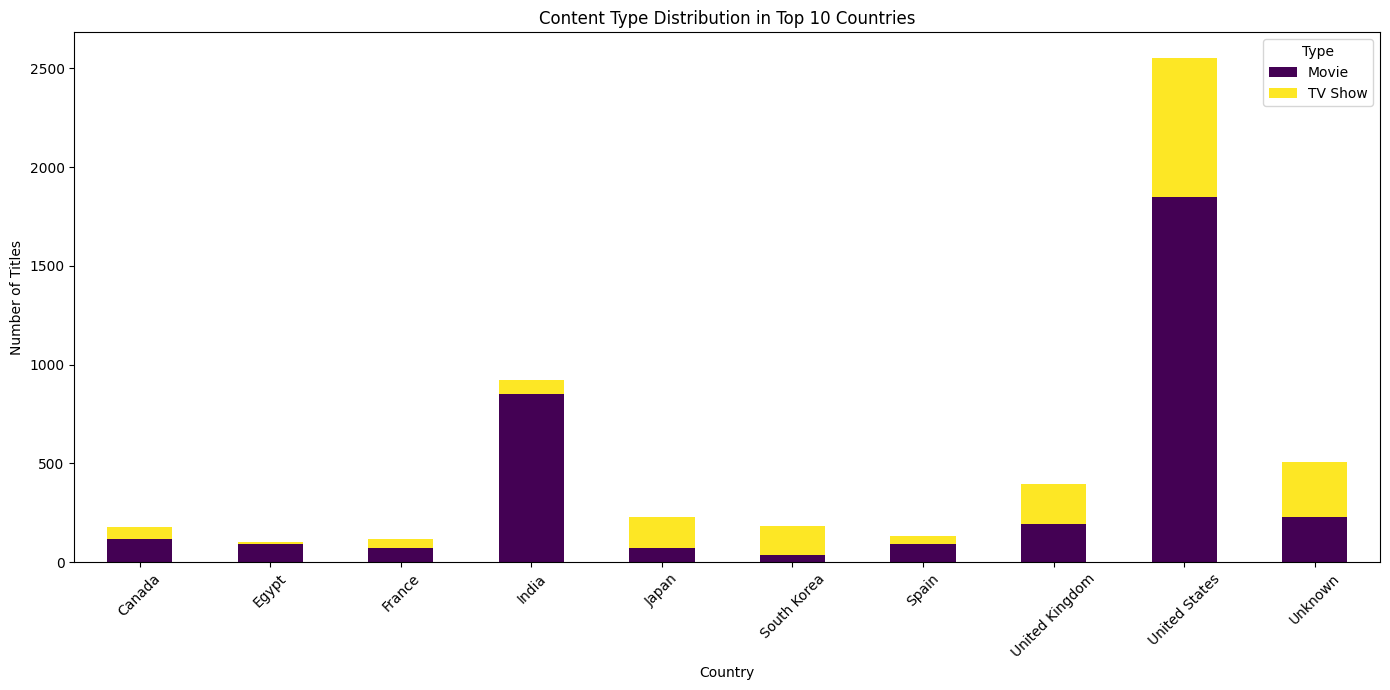

In [73]:
# Chart - 10 visualization code
top10_countries = df['country'].value_counts().head(10).index
country_type_counts = df[df['country'].isin(top10_countries)].groupby(['country', 'type']).size().unstack(fill_value=0)
country_type_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Content Type Distribution in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Stacked bar chart to compare content type across countries.

What is/are the insight(s) found from the chart?

Shows preferences/licensing of movies vs TV shows among countries.

Will the gained insights help create a positive business impact?

Yes, supports targeted content strategies per region.

#### Chart 11: Year Added vs Rating (Boxplot)

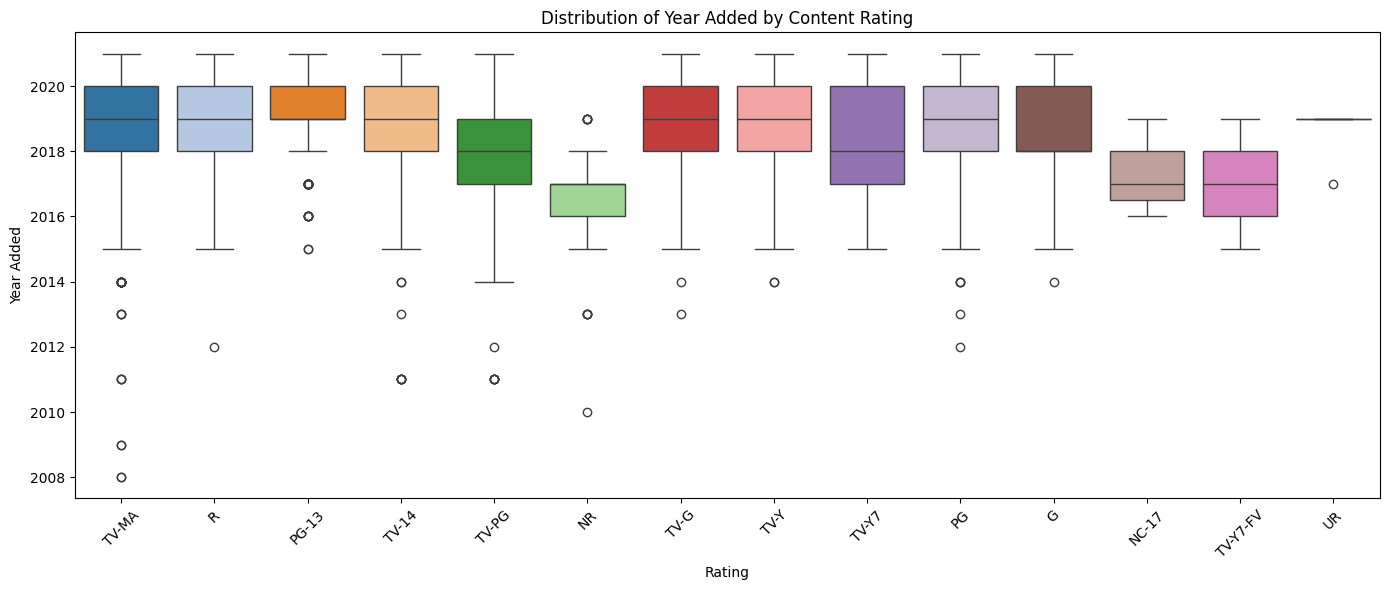

In [76]:
# Chart - 11 visualization code
plt.figure(figsize=(14, 6))
sns.boxplot(x='rating', y='year_added', data=df[df['year_added'] > 0],hue='rating', palette='tab20',legend=False)
plt.title('Distribution of Year Added by Content Rating')
plt.xlabel('Rating')
plt.ylabel('Year Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Boxplot visualizes distribution across categories.

What is/are the insight(s) found from the chart?

Newer titles tend to have certain ratings more frequently.

Will the gained insights help create a positive business impact?

Yes, helpful for approval and content targeting policies.


#### Chart 12: Yearly Trend of Movies and TV Shows Added (Lineplot)

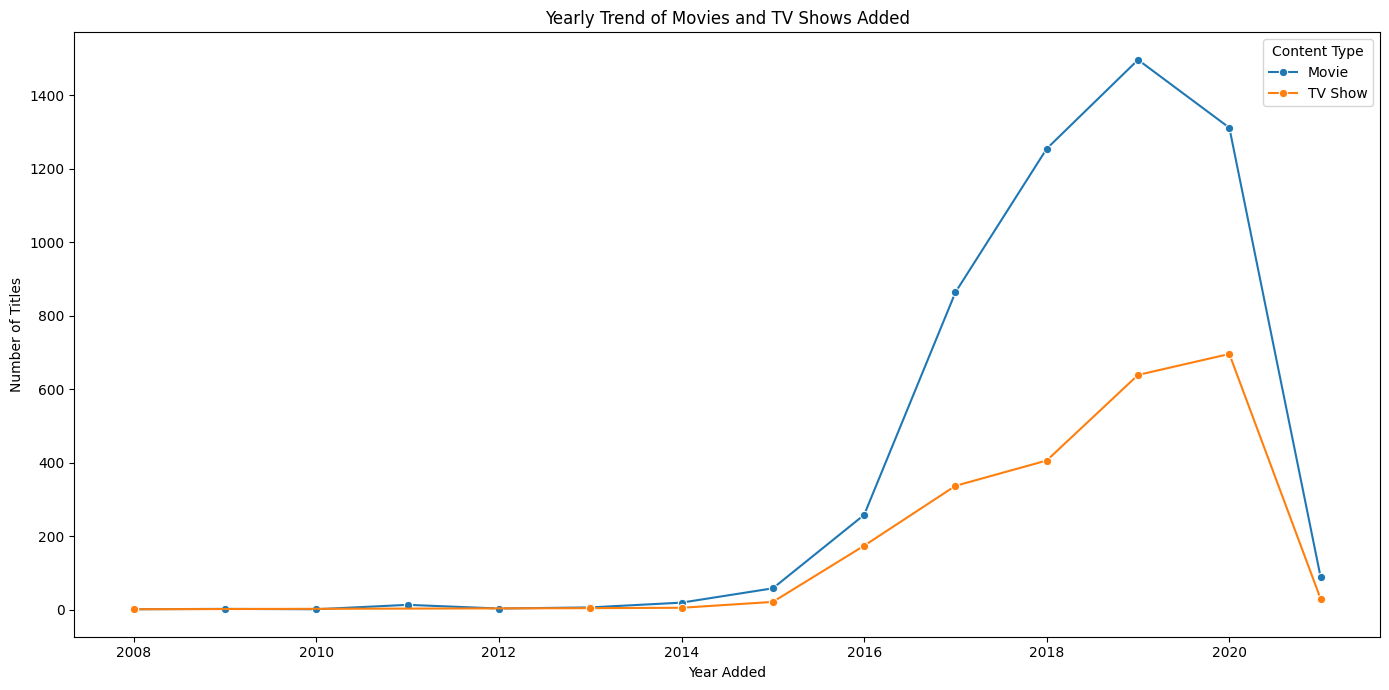

In [82]:
# Chart - 12 visualization code
plt.figure(figsize=(14,7))
yearly_counts = df.groupby(['year_added', 'type']).size().reset_index(name='count')
sns.lineplot(data=yearly_counts, x='year_added', y='count', hue='type', marker='o')
plt.title('Yearly Trend of Movies and TV Shows Added')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


Why did you pick the specific chart?

Lineplot effectively shows trends over time and comparisons between multiple categories with clarity.

What is/are the insight(s) found from the chart?

Trend lines reveal growth patterns for movies and TV shows separately, showing if one format is gaining prominence.

Will the gained insights help create a positive business impact?

Yes, helps Netflix understand evolving content focus and adjust future production or acquisition.

#### Chart 13: Release Year vs Duration by Content Type (Violin Plot)

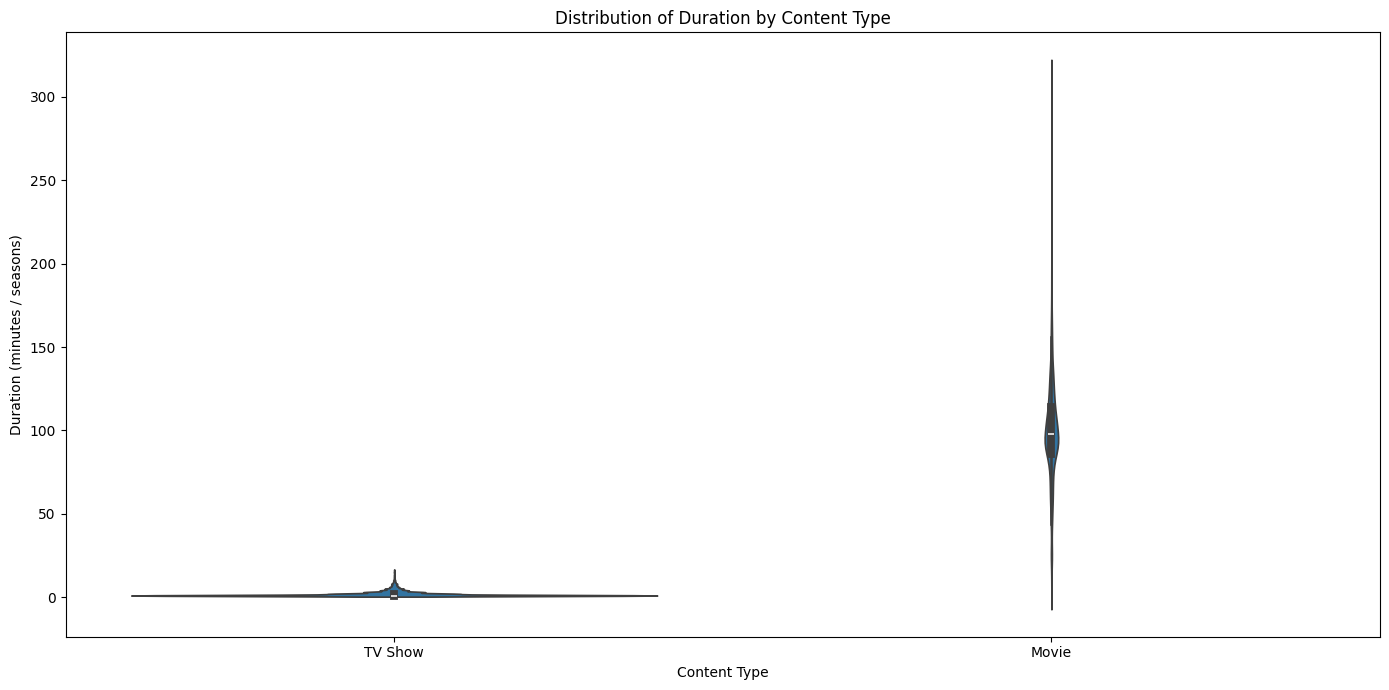

In [83]:
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)
# Chart - 13 visualization code
plt.figure(figsize=(14,7))
sns.violinplot(data=df[df['duration_minutes'].notnull()], x='type', y='duration_minutes')
plt.title('Distribution of Duration by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Duration (minutes / seasons)')
plt.tight_layout()
plt.show()


Why did you pick the specific chart?

Violin plots display distribution shape and variability of continuous data across categories, providing rich info about spread.

What is/are the insight(s) found from the chart?

The plot shows typical duration ranges for movies versus TV shows (seasons), highlighting differences in content length.

Will the gained insights help create a positive business impact?

Yes, understanding duration aids content curation and production planning tailored to viewer engagement.


#### Chart 14: Rating Distribution (Histogram)

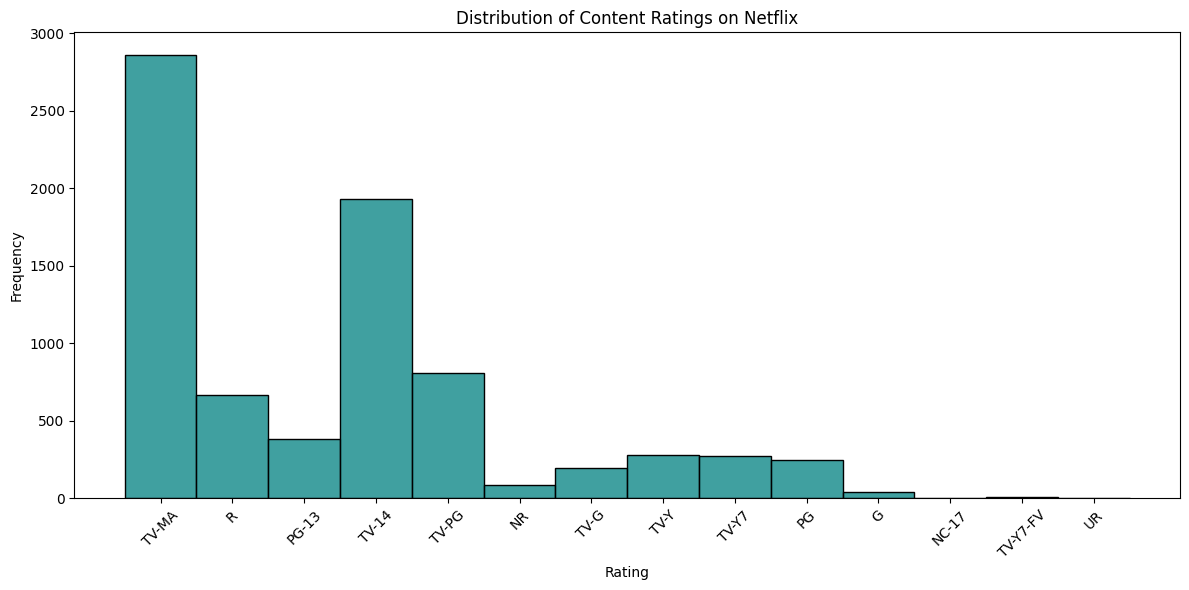

In [84]:
# Chart - 14 visualization code
plt.figure(figsize=(12,6))
ratings = df['rating'].dropna()
sns.histplot(ratings, bins=len(ratings.unique()), color='teal', edgecolor='black')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Histograms visually represent frequency distribution of categorical ratings, allowing easy identification of dominant categories.

What is/are the insight(s) found from the chart?

Identifies how many titles are in each rating bucket, revealing audience targeting and content suitability.

Will the gained insights help create a positive business impact?

Yes, helps tailor content recommendation and acquisition for different age groups or regions.


#### Chart 15: Duration Density by Content Type (KDE Plot)

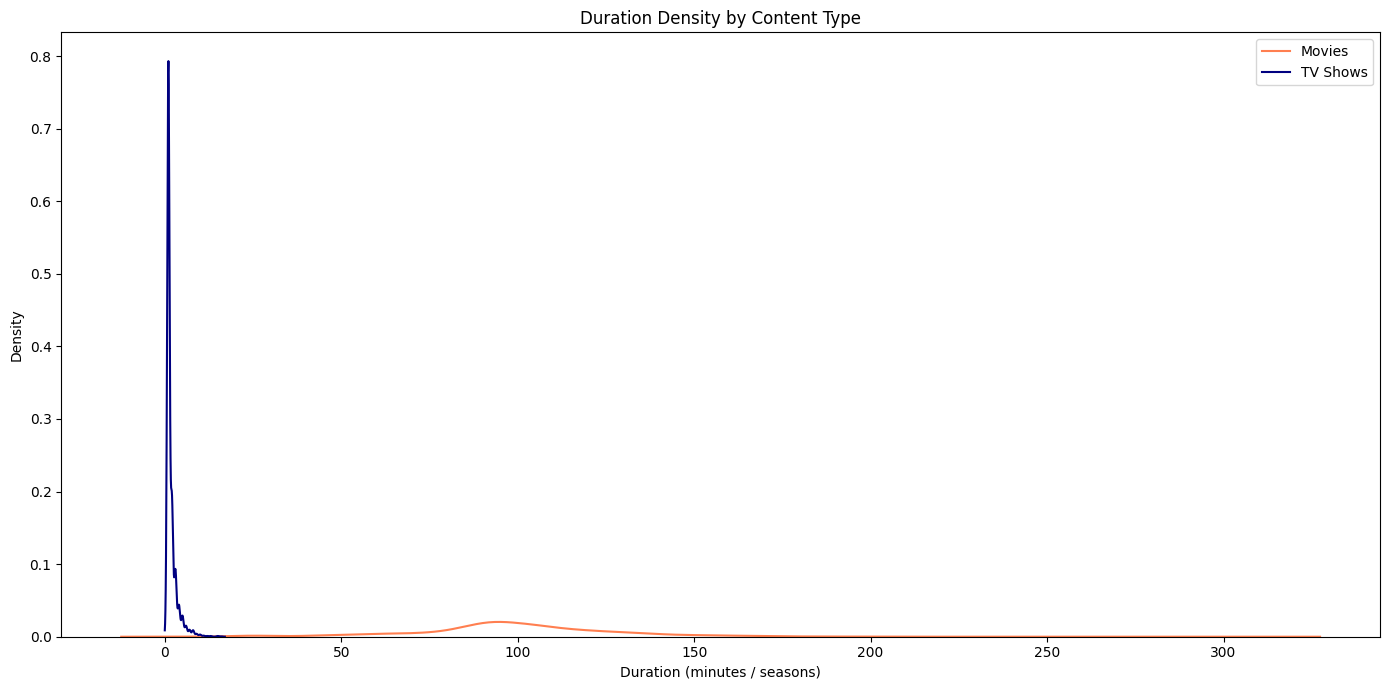

In [86]:
# Chart - 15 visualization code
plt.figure(figsize=(14,7))
movie_durations = df[(df['type']=='Movie') & (df['duration_minutes'].notnull())]['duration_minutes']
tv_durations = df[(df['type']=='TV Show') & (df['duration_minutes'].notnull())]['duration_minutes']
sns.kdeplot(movie_durations, label='Movies', color='coral')
sns.kdeplot(tv_durations, label='TV Shows', color='navy')
plt.title('Duration Density by Content Type')
plt.xlabel('Duration (minutes / seasons)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()




Why did you pick the specific chart?

KDE plots show smoothed distribution density which helps visualize content duration patterns for each type.

What is/are the insight(s) found from the chart?

Highlights typical duration peaks for movies and TV shows, showing how durations cluster by type.

Will the gained insights help create a positive business impact?

Yes, guides content length optimization to match typical successful formats.

#### chart 16: Scatter Plot: Release Year vs Duration (minutes) Colored by Content Type

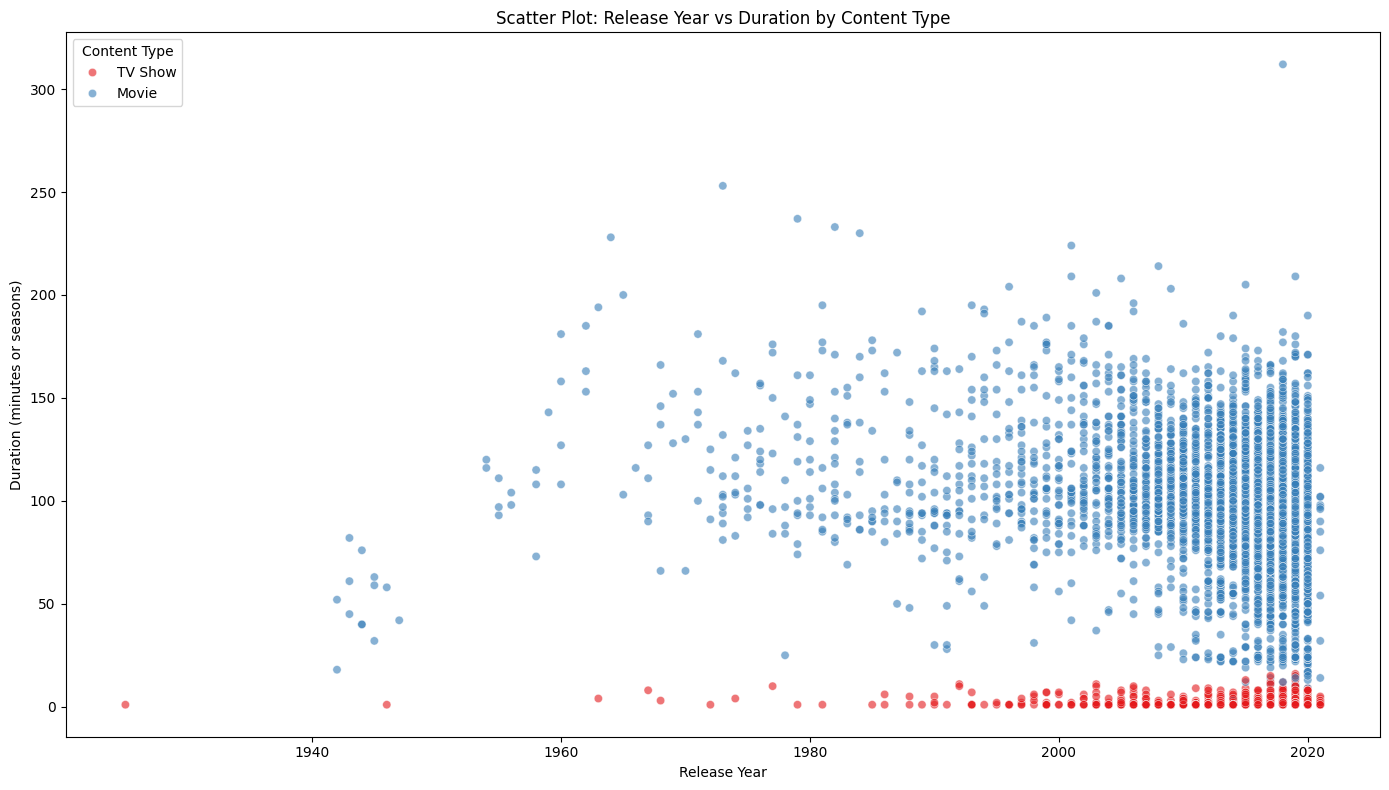

In [87]:
# Ensure 'duration_minutes' column exists (extract numeric part from 'duration')
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

# Scatter plot visualization code
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df[df['duration_minutes'].notnull() & df['release_year'].notnull()],
                x='release_year', y='duration_minutes', hue='type', alpha=0.6, palette='Set1')
plt.title('Scatter Plot: Release Year vs Duration by Content Type')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes or seasons)')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Scatter plots help visualize relationships or trends between two continuous variables (release year and duration) with a third categorical variable as hue.

What is/are the insight(s) found from the chart?

The plot reveals how content duration varies over the years for movies and TV shows, showing clusters and trends.

Will the gained insights help create a positive business impact?

Yes, it can guide understanding of content length trends over time and assist in deciding on content acquisition or production strategies.


#### chart 17: Pie Chart: Proportion of Content Types (Movies vs TV Shows)

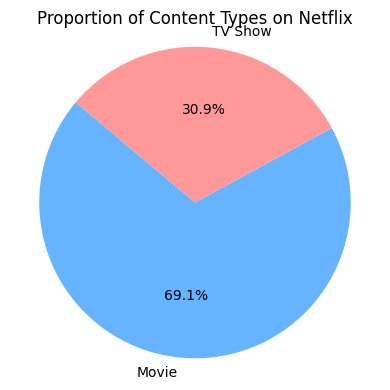

In [90]:
# Pie chart visualization code
content_type_counts = df['type'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Proportion of Content Types on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Pie charts provide an intuitive visualization of part-to-whole relationships, displaying proportions of content types.

What is/are the insight(s) found from the chart?

It shows the percentage makeup of movies and TV shows on Netflix, highlighting which type dominates.

Will the gained insights help create a positive business impact?

Yes, it helps Netflix understand content composition and balance programming accordingly to meet audience preferences.


#### chart 18:Top 10 Netflix Genres (Horizontal Bar Chart)

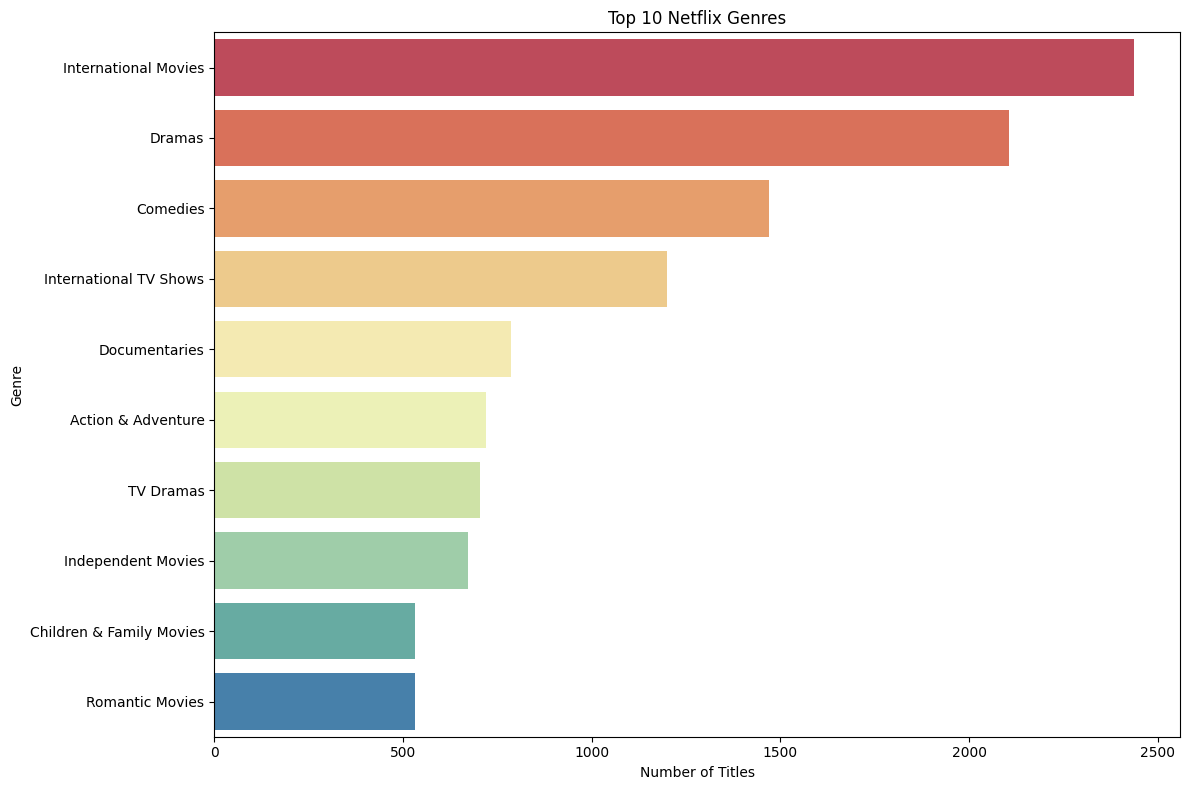

In [92]:
# Prepare genre data by splitting and exploding the 'listed_in' column
genre_series = df['listed_in'].dropna().str.split(',').explode().str.strip()
top_genres = genre_series.value_counts().head(10)

# Horizontal bar chart visualization code
plt.figure(figsize=(12,8))
colors = sns.color_palette('Spectral', len(top_genres))
sns.barplot(x=top_genres.values, y=top_genres.index,hue=top_genres.index,palette=colors,legend=False)
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Horizontal bar charts are excellent for long category names (like genres) and make comparisons easy and visually pleasing.

What is/are the insight(s) found from the chart?

This chart reveals the most prevalent genres available on Netflix, showing where content is densely concentrated.

Will the gained insights help create a positive business impact?

Yes, understanding popular genres can assist Netflix in targeted content acquisition and marketing strategies to boost viewer engagement.


#### Chart 19: Correlation Heatmap

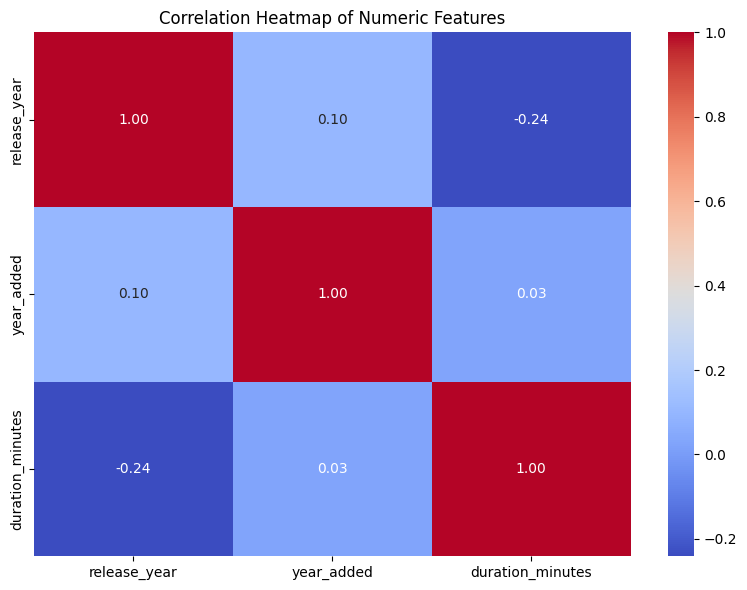

In [93]:
# Chart - 12 visualization code
# Select numeric columns for correlation
numeric_cols = ['release_year', 'year_added', 'duration_minutes']
plt.figure(figsize=(8, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()



Why did you pick the specific chart?

Heatmaps visualize correlations between numeric features effectively.

What is/are the insight(s) found from the chart?

Identifies relationships such as how year added correlates with release year or duration.

Will the gained insights help create a positive business impact?

Yes, it assists in feature selection and understanding data patterns for modeling or strategy.


#### chart20:PairPlot of Numeric features

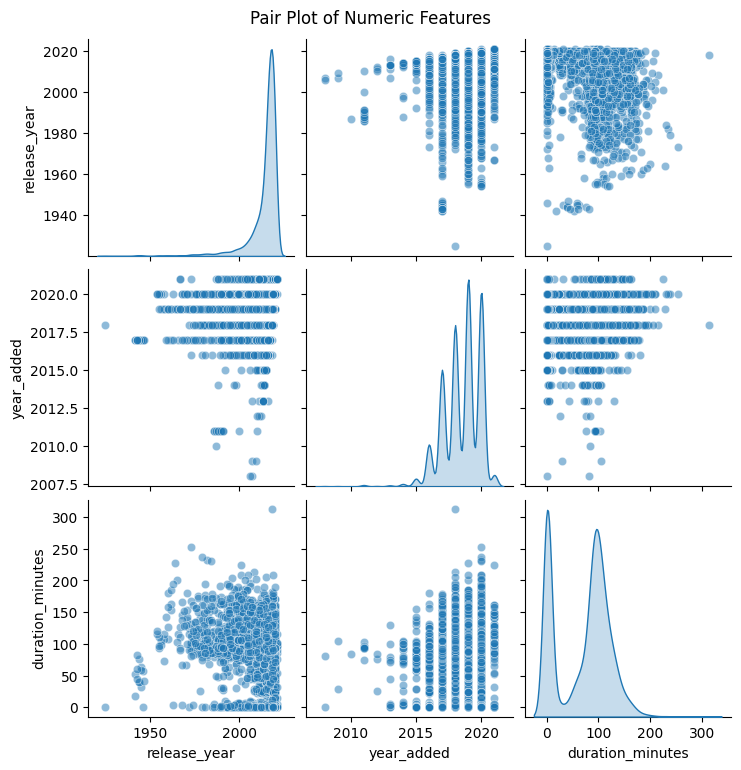

In [94]:
# Extract numeric columns for pairplot
numeric_cols = ['release_year', 'year_added']
# Also include 'duration_minutes' if it exists; create it if not
if 'duration_minutes' not in df.columns:
    df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

numeric_cols.append('duration_minutes')

# Drop rows with NaN in these columns to avoid errors in pairplot
df_numeric = df[numeric_cols].dropna()

# Pair Plot visualization code
sns.pairplot(df_numeric, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()



Why did you pick the specific chart?

Pair plots allow visualizing bivariate relationships and distributions simultaneously between multiple numeric variables.

What is/are the insight(s) found from the chart?

The plot shows correlations, clusters, or outliers between release year, year added, and content duration, helping understand data patterns.

Will the gained insights help create a positive business impact?

Yes, comprehensive understanding aids in feature engineering for modeling or guides strategy concerning content timings and lengths.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

To achieve the business objectives, Netflix should:

Focus on acquiring more diverse content in countries with fewer titles to enhance market presence.

Analyze trends in content types to align production strategies with viewer preferences, potentially increasing engagement and subscriptions.

Utilize clustering insights to identify gaps in the market and create new content that resonates with audiences.


# **Conclusion**

This EDA has provided valuable insights into Netflix's content strategy, revealing trends in content availability and types. By leveraging these insights, Netflix can make informed decisions to enhance its offerings and better serve its global audience.

### ***Hurrah! I have successfully completed my EDA Capstone Project !!!***